<a href="https://colab.research.google.com/github/singh00in/AIML/blob/main/NLP/Project/Low_Code_NLP_RAG_Project_Notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

The healthcare industry is rapidly evolving, with professionals facing increasing challenges in managing vast volumes of medical data while delivering accurate and timely diagnoses. The need for quick access to comprehensive, reliable, and up-to-date medical knowledge is critical for improving patient outcomes and ensuring informed decision-making in a fast-paced environment.

Healthcare professionals often encounter information overload, struggling to sift through extensive research and data to create accurate diagnoses and treatment plans. This challenge is amplified by the need for efficiency, particularly in emergencies, where time-sensitive decisions are vital. Furthermore, access to trusted, current medical information from renowned manuals and research papers is essential for maintaining high standards of care.

To address these challenges, healthcare centers can focus on integrating systems that streamline access to medical knowledge, provide tools to support quick decision-making, and enhance efficiency. Leveraging centralized knowledge platforms and ensuring healthcare providers have continuous access to reliable resources can significantly improve patient care and operational effectiveness.

**Common Questions to Answer**

**1. Diagnostic Assistance**: "What are the common symptoms and treatments for pulmonary embolism?"

**2. Drug Information**: "Can you provide the trade names of medications used for treating hypertension?"

**3. Treatment Plans**: "What are the first-line options and alternatives for managing rheumatoid arthritis?"

**4. Specialty Knowledge**: "What are the diagnostic steps for suspected endocrine disorders?"

**5. Critical Care Protocols**: "What is the protocol for managing sepsis in a critical care unit?"

### Objective

As an AI specialist, your task is to develop a RAG-based AI solution using renowned medical manuals to address healthcare challenges. The objective is to **understand** issues like information overload, **apply** AI techniques to streamline decision-making, **analyze** its impact on diagnostics and patient outcomes, **evaluate** its potential to standardize care practices, and **create** a functional prototype demonstrating its feasibility and effectiveness.

### Data Description

The **Merck Manuals** are medical references published by the American pharmaceutical company Merck & Co., that cover a wide range of medical topics, including disorders, tests, diagnoses, and drugs. The manuals have been published since 1899, when Merck & Co. was still a subsidiary of the German company Merck.

The manual is provided as a PDF with over 4,000 pages divided into 23 sections.

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_____' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_____' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

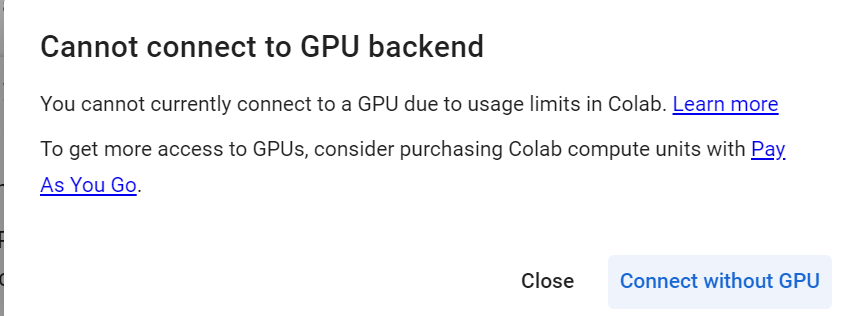

## Installing and Importing Necessary Libraries and Dependencies

In [ ]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.28 numpy==2.0.0 --force-reinstall --no-cache-dir -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.28 numpy==2.0.0 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 122.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 339.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 142.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 295.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 304.0 MB/s eta 0:00:00


**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

orginal lagchain 0.3.27

In [ ]:
# For installing the libraries & downloading models from HF Hub
!pip install huggingface_hub==0.35.3 pandas==2.2.2 tiktoken==0.12.0 pymupdf==1.26.5 langchain==1.0.0 langchain-community==0.3.31 chromadb==1.1.1 sentence-transformers==5.1.1 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.2/106.2 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 114.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 121.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.6/486.6 kB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 8.5 MB/s e

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [ ]:
#Libraries for downloading and loading the llm
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

## Question Answering using LLM

### Downloading and Loading the model

In [ ]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [ ]:
model_path = hf_hub_download(
    repo_id= model_name_or_path, #Complete the code to mention the repo id
    filename= model_basename #Complete the code to mention the model name
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

orginal
n_ctx=2300,

In [ ]:
#uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
   model_path=model_path,
  n_ctx=5000,
 n_gpu_layers=38,
 n_batch=512
)

AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 1 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


In [ ]:
#uncomment the below snippet of code if the runtime is connected to CPU only.
llm = Llama(
    model_path=model_path,
    n_ctx=1024,
    n_cores=-2
)

AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 0 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


### Response

In [ ]:
def response(query,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    model_output = llm(
      prompt=query,
      max_tokens=max_tokens,
      temperature=temperature,
      top_p=top_p,
      top_k=top_k
    )

    return model_output['choices'][0]['text']

In [ ]:
response("What treatment options are available for managing hypertension?")

'\n\nHypertension, or high blood pressure, is a common condition that can increase the risk of various health problems such as heart disease, stroke, and kidney damage. The good news is that there are several effective treatment options available to help manage hypertension and reduce the risk of complications. Here are some of the most commonly used treatments:\n\n1. Lifestyle modifications: Making lifestyle changes is often the first line of defense against hypertension. This may include eating a healthy diet rich in fruits, vegetables, whole grains, and lean proteins; limiting sodium intake; getting regular physical activity'

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
response(user_input)

Llama.generate: prefix-match hit


'\n\nSepsis is a life-threatening condition that can arise from an infection, and it requires prompt recognition and aggressive management in a critical care unit. The following are general steps for managing sepsis in a critical care unit:\n\n1. Early recognition: Recognize the signs and symptoms of sepsis early and initiate treatment as soon as possible. Sepsis can present with various clinical features, including fever or hypothermia, tachycardia or bradycardia, altered mental status, respiratory distress, and lactic acidosis.\n2. ABCs'

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_input_2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to define the query #2
response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\n\nAppendicitis is a medical condition characterized by inflammation of the appendix, a small pouch-like structure that extends from the large intestine. The symptoms of appendicitis can vary from person to person, but some common signs include:\n\n1. Abdominal pain: The pain is typically located in the lower right side of the abdomen and may be constant or come and go. It may start as a mild discomfort that worsens over time.\n2. Loss of appetite: People with appendicitis often lose their appetite due to abdominal pain and nausea'

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_input_3 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to define the query #3
response(user_input_3) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n\nSudden patchy hair loss, also known as alopecia areata, is a common autoimmune disorder that affects the hair follicles. It can result in round or oval bald patches on the scalp, but it can also occur on other parts of the body such as the beard area, eyebrows, and eyelashes.\n\nThe exact cause of alopecia areata is not known, but it's believed to be related to a problem with the immune system. Some possible triggers for this condition include stress, genetics, viral infections, and certain medications."

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_input_4 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to define the query #4
response(user_input_4) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\n\nA person who has sustained a physical injury to the brain tissue may require various treatments depending on the severity and location of the injury. Here are some common treatments that may be recommended:\n\n1. Emergency care: In case of a traumatic brain injury (TBI), it is essential to seek emergency medical attention as soon as possible. The primary goal of emergency care is to prevent further damage to the brain, stabilize vital signs, and manage any life-threatening conditions.\n2. Medications: Depending on the symptoms, healthcare professionals may prescribe medications to manage various conditions associated with a'

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_input_5 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to define the query #5
response(user_input_5) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n\nFirst and foremost, if you suspect that someone has fractured their leg while hiking, it's essential to ensure their safety and prevent further injury. Here are some necessary precautions:\n\n1. Keep the person calm and still: Encourage them to remain as still as possible to minimize pain and prevent worsening the injury.\n2. Assess the situation: Check for any signs of shock, such as pale skin, rapid heartbeat, or shallow breathing. If you notice these symptoms, seek medical help immediately.\n3. Immobilize the leg: Use a splint, sl"

## Question Answering using LLM with Prompt Engineering

In [ ]:
system_prompt = """
You are a highly experienced Medical Consultant and Critical Care Specialist.
Your task is to provide detailed, evidence-based medical information based on current
clinical guidelines (such as the Surviving Sepsis Campaign or WHO standards).

For each question provided:
1. Use clear headings for different sections of the answer.
2. Maintain a professional, clinical, yet accessible tone.
3. Distinguish clearly between diagnostic signs, immediate interventions, and long-term recovery.
4. Include a standard medical disclaimer at the end.
 """ #Complete the code to define the system prompt

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_input = system_prompt+"\n"+ "What is the protocol for managing sepsis in a critical care unit?"
response(user_input)

Llama.generate: prefix-match hit


'\n\n**Section 1: Definition and Recognition of Sepsis**\n\nSepsis is a life-threatening condition caused by a dysregulated host response to infection. It can lead to tissue damage, multiple organ failure, and even death if not recognized and treated promptly. The definition of sepsis has evolved over the years, with the most recent update being from the Third International Consensus Definitions for Sepsis and Septic Shock (Sepsis-3) in 2016.\n\n**Section 2: Early Recognition and Diagnosis**'

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_input_P1 = system_prompt+"\n"+ "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"  #Complete the code to pass the query #2
response(user_input_P1) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\n\n**Symptoms of Appendicitis:**\n\nAppendicitis is a common inflammatory condition characterized by the swelling and eventual rupture of the appendix. The following are the most common symptoms:\n\n1. **Periumbilical or right lower quadrant abdominal pain:** This is often described as a dull ache that may progress to sharp, localized pain in the right lower quadrant of the abdomen.\n2. **Anorexia and nausea:** Loss of appetite and feeling sick to your stomach are common symptoms. Vomiting may occur'

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_input_P2 = system_prompt+"\n"+ "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"  #Complete the code to pass the query #3
response(user_input_P2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\n\n**Section 1: Possible Causes of Sudden Patchy Hair Loss**\n\nSudden patchy hair loss, also known as alopecia areata, is an autoimmune disorder that results in the sudden onset of round or oval bald patches on the scalp. The exact cause of this condition is unknown, but several factors have been implicated:\n\n1. **Genetics:** Alopecia areata has a strong genetic component, with up to 20% of cases being hereditary.\n2. **Immune System Dysfunction:**'

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_input_P3 = system_prompt+"\n"+ "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?"  #Complete the code to pass the query #4
response(user_input_P3) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n\n**Heading 1: Initial Assessment and Stabilization**\n\nIn case of a suspected traumatic brain injury (TBI), the first priority is to ensure the safety and stability of the patient. This includes securing the airway, maintaining adequate ventilation, and controlling any bleeding. The following interventions are recommended based on current clinical guidelines:\n\n1. **Airway Management:** If there's a risk of airway obstruction or aspiration, secure the airway using endotracheal intubation. Monitor the patient's level of consciousness (LOC) and oxygen"

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_input_P4 = system_prompt+"\n"+ "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"  #Complete the code to pass the query #5
response(user_input_P4) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\n\n**Necessary Precautions:**\n\n1. **Immediate Assessment:** Evaluate the severity of the injury by assessing the level of pain, swelling, deformity, open wounds, and signs of neurovascular compromise such as pulselessness, pallor, or paralysis. If there are signs of severe injury, immobilize the leg using a splint or a C-collar and transport the patient to the nearest emergency department as soon as possible.\n2. **Maintain Immobility:** Avoid moving the fractured leg excessively to prevent'

## Data Preparation for RAG

In [ ]:
#Libraries for processing dataframes,text
!pip install langchain-text-splitters
import json,os
import tiktoken
import pandas as pd
import langchain
langchain.debug = False
#Libraries for Loading Data, Chunking, Embedding, and Vector Databases
from langchain_text_splitters import RecursiveCharacterTextSplitter
#from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain_community.vectorstores import Chroma

### Loading the Data

In [ ]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
manual_pdf_path = "/content/drive/My Drive/PG-AIML/NLP/Project/medical_diagnosis_manual.pdf" #Complete the code to define the file name

In [ ]:
pdf_loader = PyMuPDFLoader(manual_pdf_path)

In [ ]:
manual = pdf_loader.load()

### Data Overview

#### Checking the first 5 pages

In [ ]:
for i in range(5):
    print(f"Page Number : {i+1}",end="\n")
    print(manual[i].page_content,end="\n")

Page Number : 1
singh00in@gmail.com
L317U2ZYHT
eant for personal use by singh00in@gm
shing the contents in part or full is liable
Page Number : 2
singh00in@gmail.com
L317U2ZYHT
This file is meant for personal use by singh00in@gmail.com only.
Sharing or publishing the contents in part or full is liable for legal action.
Page Number : 3
Table of Contents
1
Front    ................................................................................................................................................................................................................
1
Cover    .......................................................................................................................................................................................................
2
Front Matter    ...........................................................................................................................................................................................
53
1 - N

#### Checking the number of pages

In [ ]:
len(manual)

4114

### Data Chunking

In [ ]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    encoding_name='cl100k_base',
    chunk_size=512, #Complete the code to define the chunk size
    chunk_overlap= 20 #Complete the code to define the chunk overlap
)

In [ ]:
document_chunks = pdf_loader.load_and_split(text_splitter)

In [ ]:
len(document_chunks)

8446

In [ ]:
document_chunks[0].page_content

'singh00in@gmail.com\nL317U2ZYHT\neant for personal use by singh00in@gm\nshing the contents in part or full is liable'

In [ ]:
document_chunks[2].page_content

'Table of Contents\n1\nFront    ................................................................................................................................................................................................................\n1\nCover    .......................................................................................................................................................................................................\n2\nFront Matter    ...........................................................................................................................................................................................\n53\n1 - Nutritional Disorders    ...............................................................................................................................................................\n53\nChapter 1. Nutrition: General Considerations    ...........................................................................................

In [ ]:
document_chunks[3].page_content

"Chapter 24. Testing for Hepatic & Biliary Disorders    ......................................................................................................\n305\nChapter 25. Drugs & the Liver    ................................................................................................................................................\n308\nChapter 26. Alcoholic Liver Disease    ....................................................................................................................................\n314\nChapter 27. Fibrosis & Cirrhosis    ............................................................................................................................................\n322\nChapter 28. Hepatitis    ..................................................................................................................................................................\n333\nChapter 29. Vascular Disorders of the Liver    .................................................

As expected, there are some overlaps

### Embedding

In [ ]:
embedding_model = SentenceTransformerEmbeddings(model_name='thenlper/gte-large') #Complete the code to define the model name

/tmp/ipython-input-1834552485.py:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = SentenceTransformerEmbeddings(model_name='thenlper/gte-large') #Complete the code to define the model name


modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

converting chunk[0] and chunk[1] into the embeding

In [ ]:
embedding_1 = embedding_model.embed_query(document_chunks[0].page_content)
embedding_2 = embedding_model.embed_query(document_chunks[1].page_content)

In [ ]:
print("Dimension of the embedding vector ",len(embedding_1))
len(embedding_1)==len(embedding_2)

Dimension of the embedding vector  1024


True

In [ ]:
embedding_1,embedding_2

([-0.037150394171476364,
  -0.0010103723034262657,
  -0.005701867397874594,
  0.009168359450995922,
  -0.016925351694226265,
  -0.03573554754257202,
  -0.009511252865195274,
  0.032042112201452255,
  0.0028071373235434294,
  0.022456737235188484,
  0.02252708002924919,
  -0.007892352528870106,
  0.015842517837882042,
  -0.0304663497954607,
  0.002344918204471469,
  -0.01133580319583416,
  -0.006548027973622084,
  -0.032457392662763596,
  0.004606291651725769,
  0.010873561725020409,
  0.012721845880150795,
  -0.006698876619338989,
  -0.07312314212322235,
  -0.029326630756258965,
  -0.008579709567129612,
  0.01989935338497162,
  0.03454608842730522,
  -0.008144049905240536,
  0.06165458634495735,
  0.050562869757413864,
  -0.014790213666856289,
  -0.0021719636861234903,
  0.03681349754333496,
  -0.047092586755752563,
  -0.022033046931028366,
  -0.0011471030302345753,
  0.04603268951177597,
  -0.024524588137865067,
  -0.033137742429971695,
  -0.04601983726024628,
  0.006470066029578447,


### Vector Database

In [ ]:
out_dir = 'medical_db'

if not os.path.exists(out_dir):
  os.makedirs(out_dir)

ChromaDB is free open source for learning

In [ ]:
vectorstore = Chroma.from_documents(
    document_chunks, #Complete the code to pass the document chunks
    embedding_model, #Complete the code to pass the embedding model
    persist_directory=out_dir
)

In [ ]:
vectorstore = Chroma(persist_directory=out_dir,embedding_function=embedding_model)

/tmp/ipython-input-2756559696.py:1: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the `langchain-chroma package and should be used instead. To use it run `pip install -U `langchain-chroma` and import as `from `langchain_chroma import Chroma``.
  vectorstore = Chroma(persist_directory=out_dir,embedding_function=embedding_model)


In [ ]:
vectorstore.embeddings

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False, 'architecture': 'BertModel'})
  (1): Pooling({'word_embedding_dimension': 1024, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
), model_name='thenlper/gte-large', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False, show_progress=False)

Below code  is done as Cosine Similirity

In [ ]:
vectorstore.similarity_search("Musculoskeletal and Connective Tissue Disorders",k=3) #Complete the code to pass a query and an appropriate k value

[Document(metadata={'moddate': '2025-12-07T01:16:00+00:00', 'creationdate': '2012-06-15T05:44:40+00:00', 'keywords': '', 'modDate': 'D:20251207011600Z', 'source': '/content/drive/My Drive/PG-AIML/NLP/Project/medical_diagnosis_manual.pdf', 'creationDate': 'D:20120615054440Z', 'creator': 'Atop CHM to PDF Converter', 'total_pages': 4114, 'page': 371, 'file_path': '/content/drive/My Drive/PG-AIML/NLP/Project/medical_diagnosis_manual.pdf', 'author': '', 'producer': 'pdf-lib (https://github.com/Hopding/pdf-lib)', 'format': 'PDF 1.7', 'trapped': '', 'subject': '', 'title': 'The Merck Manual of Diagnosis & Therapy, 19th Edition'}, page_content="4 - Musculoskeletal and Connective Tissue Disorders\nChapter 32. Approach to the Patient With Joint Disease\nIntroduction\nSome musculoskeletal disorders affect primarily the joints, causing arthritis. Others affect primarily the\nbones (eg, fractures, Paget's disease, tumors), muscles or other extra-articular soft tissues (eg,\nfibromyalgia), or periar

### Retriever

This Tiny LLM (CromaDB is itself smart retriver which are being used very currently)

In [ ]:
retriever = vectorstore.as_retriever(
    search_type='similarity',
    search_kwargs={'k': 2} #Complete the code to pass an appropriate k value
)

In [ ]:
#rel_docs = retriever.get_relevant_documents("What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?") #Complete the code to pass the query
rel_docs = retriever.invoke("What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?") #Complete the code to pass the query
rel_docs

[Document(metadata={'keywords': '', 'author': '', 'file_path': '/content/drive/My Drive/PG-AIML/NLP/Project/medical_diagnosis_manual.pdf', 'trapped': '', 'moddate': '2025-12-07T01:16:00+00:00', 'creationdate': '2012-06-15T05:44:40+00:00', 'page': 174, 'modDate': 'D:20251207011600Z', 'title': 'The Merck Manual of Diagnosis & Therapy, 19th Edition', 'creationDate': 'D:20120615054440Z', 'source': '/content/drive/My Drive/PG-AIML/NLP/Project/medical_diagnosis_manual.pdf', 'creator': 'Atop CHM to PDF Converter', 'total_pages': 4114, 'producer': 'pdf-lib (https://github.com/Hopding/pdf-lib)', 'subject': '', 'format': 'PDF 1.7'}, page_content="• Surgical removal\n• IV fluids and antibiotics\nTreatment of acute appendicitis is open or laparoscopic appendectomy; because treatment delay\nincreases mortality, a negative appendectomy rate of 15% is considered acceptable. The surgeon can\nusually remove the appendix even if perforated. Occasionally, the appendix is difficult to locate: In these\nca

In [ ]:
model_output = llm(
      "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?", #Complete the code to pass the query
      max_tokens=450, #Complete the code to pass the maximum number of tokens
      temperature=0, #Complete the code to pass the temperature
    )

In [ ]:
model_output['choices'][0]['text']

"\n\nAppendicitis is a medical condition characterized by inflammation of the appendix, a small pouch-like structure that extends from the large intestine. The symptoms of appendicitis can vary from person to person, but some common signs include:\n\n1. Abdominal pain: The pain is typically located in the lower right side of the abdomen and may be constant or come and go. It may start as a mild discomfort that worsens over time.\n2. Loss of appetite: People with appendicitis often lose their appetite due to abdominal pain and nausea.\n3. Nausea and vomiting: Vomiting is a common symptom of appendicitis, especially in the early stages.\n4. Fever: A fever may be present, particularly if the appendix has ruptured or perforated.\n5. Constipation or diarrhea: Some people with appendicitis experience constipation, while others have diarrhea.\n6. Abdominal swelling: The abdomen may become swollen and tender to the touch.\n7. Inability to pass gas: Passing gas can be difficult due to the press

The above response is somewhat generic and is solely based on the data the model was trained on, rather than the medical manual.  

Let's now provide our own context.

### System and User Prompt Template

Prompts guide the model to generate accurate responses. Here, we define two parts:

    1. The system message describing the assistant's role.
    2. A user message template including context and the question.

In [ ]:
qna_system_message = """
You are an assistant whose work is to review the report and provide the appropriate answers from the context.
User input will have the context required by you to answer user questions.
This context will begin with the token: ###Context.
The context contains references to specific portions of a document relevant to the user query.

User questions will begin with the token: ###Question.

Please answer only using the context provided in the input. Do not mention anything about the context in your final answer.

If the answer is not found in the context, respond "I don't know".

"""  #Complete the code to define the system message

In [ ]:
qna_user_message_template = """
###Context
Here are some documents that are relevant to the question mentioned below.
{context}

###Question
{question}
""" #Complete the code to define the user message

### Response Function

K=3-->
The AI doesn't just guess. It takes your question and searches through a library of documents (like medical journals or manuals) to find the top 3 snippets (k=3) that seem most relevant to what you

Top_p / Top_k: these are filters that help the AI choose the most likely next word, ensuring the sentence makes sense.

Temperature (0): This is set to zero, meaning "Be Boring." It tells the AI to be literal and consistent. In medical answers, you want this at 0 so it doesn't "hallucinate" or get creative with facts.

max_tokens=max_tokens (set to 128) This is exactly why your previous medical answers were cutting off! You have told the AI it is only allowed to use 128 "tokens" (roughly 90-100 words). Once it hits that limit, it stops instantly, even if it's in the middle of a sentence.

In [ ]:
def generate_rag_response(user_input,k=3,max_tokens=256,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    #relevant_document_chunks = retriever.invoke(query=user_input,k=k)
    #relevant_document_chunks = retriever.invoke(query=user_input)
    relevant_document_chunks = retriever.with_config(
        {"search_kwargs": {"k": k}}
    ).invoke(user_input)
    context_list = [d.page_content for d in relevant_document_chunks]

    # Combine document chunks into a single context
    context_for_query = ". ".join(context_list)

    user_message = qna_user_message_template.replace('{context}', context_for_query)
    user_message = user_message.replace('{question}', user_input)

    prompt = qna_system_message + '\n' + user_message

    # Generate the response
    try:
        response = llm(
                  prompt=prompt,
                  max_tokens=max_tokens,
                  temperature=temperature,
                  top_p=top_p,
                  top_k=top_k
                  )

        # Extract and print the model's response
        response = response['choices'][0]['text'].strip()
    except Exception as e:
        response = f'Sorry, I encountered the following error: \n {e}'

    return response

## Question Answering using RAG

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input,top_k=20)

Llama.generate: prefix-match hit


'Based on the context provided, the protocol for managing sepsis in a critical care unit includes:\n1. Administering parenteral antibiotics after taking specimens for Gram stain and culture.\n2. Starting very prompt empiric therapy as soon as sepsis is suspected.\n3. Selecting an antibiotic regimen based on the suspected source, clinical setting, knowledge or suspicion of causative organisms and sensitivity patterns common to that specific inpatient unit, and previous culture results.\n4. Adding vancomycin if resistant staphylococci or enterococci are suspected.\n5. Including a drug effective against anaerobes if there is an abdominal source.\n6. Changing the antibiotic regimen based on culture and sensitivity results.\n7. Continuing antibiotics for at least 5 days after shock resolves and evidence of infection subsides.\n8. Draining abscesses and excising necrotic tissues to eliminate septic foci.\n9. Normalizing blood glucose levels between 80 to 110 mg/dL (4.4 to 6.'

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_input_2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?"
 #Complete the code to pass the query #2
generate_rag_response(user_input_2,top_k=20) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'###Answer\nThe common symptoms for appendicitis include abdominal pain, anorexia, and abdominal tenderness. Appendicitis cannot be cured via medicine alone; surgery, specifically a surgical removal of the appendix (appendectomy), is required for treatment.'

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_input_rag3 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?"
 #Complete the code to pass the query #3
generate_rag_response(user_input_rag3,top_k=20) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'Based on the context provided, the condition being described is Alopecia Areata. The effective treatments for this condition include topical, intralesional, or systemic corticosteroids, topical minoxidil, topical anthralin, topical immunotherapy (diphencyprone or squaric acid dibutylester), or psoralen plus ultraviolet A (PUVA). The possible cause behind sudden patchy hair loss in this context is an autoimmune disorder.'

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_input_rag4 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to pass the query #4
generate_rag_response(user_input_rag4,top_k=20) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'Based on the context provided, the following treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function:\n\n1. Initial treatment: Ensuring a reliable airway and maintaining adequate ventilation, oxygenation, and blood pressure. Surgery may be needed in patients with more severe injury to place monitors to track and treat intracranial pressure, decompress the brain if intracranial pressure is increased, or remove intracranial hematomas.\n2. Supportive care: Preventing systemic complications due to'

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_input_rag5 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?"
#Complete the code to pass the query #5
generate_rag_response(user_input_rag5,top_k=20) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'Based on the context provided, here is the answer:\n\nThe person with a fractured leg should elevate the injured limb above heart level for the first 2 days to minimize swelling. After 48 hours, they can apply warmth using a heating pad for 15 to 20 minutes to relieve pain and speed healing. Immobilization is necessary to prevent further injury and facilitate healing. Joints proximal and distal to the injury should be immobilized using either a cast or a splint. A cast is usually used for fractures that require weeks of immobilization, while a splint can be used for injuries that only need immobilization for several days. The person should keep the cast dry, never put an object inside it, inspect the edges and skin around the cast daily, apply lotion to any red or sore areas, pad any rough edges with soft material, and seek medical care if they notice an odor from within the cast or a fever indicating infection. Good hygiene is important. If severe swelling is likely, the cast may be 

### Fine-tuning

#### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_input_ragfin1 = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input_ragfin1,temperature=0.5)

'The context provides information on managing sepsis in a critical care unit, including recommended antibiotic regimens and the importance of draining abscesses and eliminating septic foci. The text suggests that prompt empiric therapy is essential and may be lifesaving. Antibiotics should be started immediately after suspecting sepsis and selected based on the suspected source, clinical setting, knowledge or suspicion of causative organisms, and sensitivity patterns common to that specific inpatient unit. One regimen for septic shock of unknown cause includes gentamicin or tobramycin 5.1 mg/kg IV once/day plus a 3rd-generation cephalosporin (cefotaxime 2 g q 6 to 8 h or ceftriaxone 2 g once/day) or, if Pseudomonas is suspected, ceftazidime 2 g IV q 8 h. Vancomycin must be added if resistant staphylococci or enterococci are suspected. If there is an abdominal source, a drug effective against anaerobes (eg, metronidazole) should be included'

#### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
user_input_ragfin2 = "What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to pass the query #2
generate_rag_response(user_input_ragfin2,temperature=0.5,max_tokens=512) #Complete the code to pass the user input along with the parameters

Llama.generate: prefix-match hit


'###Answer\nThe common symptoms for appendicitis include abdominal pain, anorexia, and abdominal tenderness. Appendicitis cannot be cured via medicine alone; instead, surgical removal of the appendix (appendectomy) is required for treatment.'

#### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
user_input_ragfin3 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to pass the query #3
generate_rag_response(user_input_ragfin3,temperature=0.5,max_tokens=512) #Complete the code to pass the user input along with the parameters

Llama.generate: prefix-match hit


'Based on the context provided, the condition being described is Alopecia Areata. The effective treatments for this condition include topical, intralesional, or systemic corticosteroids, topical minoxidil, topical anthralin, topical immunotherapy (diphencyprone or squaric acid dibutylester), or psoralen plus ultraviolet A (PUVA). It is important to note that these treatments may have adverse effects and should be used under the guidance of a healthcare professional. The possible cause behind sudden patchy hair loss in Alopecia Areata is an autoimmune disorder affecting genetically susceptible people exposed to unclear environmental triggers.'

#### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
user_input_ragfin4 = " What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to pass the query #4
generate_rag_response(user_input_ragfin4,temperature=0.5) #Complete the code to pass the user input along with the parameters

Llama.generate: prefix-match hit


'From the context, it states that "Initial treatment consists of ensuring a reliable airway and maintaining adequate ventilation, oxygenation, and blood pressure. Surgery is often needed in patients with more severe injury to place monitors to track and treat intracranial pressure, decompress the brain if intracranial pressure is increased, or remove intracranial hematomas." Additionally, "Subsequently, many patients require rehabilitation." It also mentions that there is no specific treatment for TBI but supportive care should include preventing systemic complications due to immobilization, providing good nutrition, and preventing pressure ulcers. Therefore, the recommended treatments for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function, are ensuring a reliable airway, maintaining adequate ventilation, oxygenation, and blood pressure, surgery if necessary, rehabilitation, preventing systemic complications du

#### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
user_input_ragfin5 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to pass the query #5
generate_rag_response(user_input_ragfin5,temperature=0.5) #Complete the code to pass the user input along with the parameters

Llama.generate: prefix-match hit


'The context provides information about the symptoms of a fracture, which include pain, swelling, ecchymosis, crepitation, deformity, and abnormal motion. It also mentions that treatment involves analgesics, immobilization, and sometimes surgery. The context specifically discusses the use of elastic bandages for initial injury care, elevation of the injured limb to minimize swelling, and periodic application of warmth after 48 hours to relieve pain and speed healing. It also mentions the importance of immobilizing joints proximal and distal to the injury, using a cast or splint depending on the length of immobilization required, and keeping the cast dry and inspecting the skin around it daily for signs of infection or irritation. The context also discusses potential complications of prolonged immobilization, such as stiffness, contractures, and muscle atrophy. It suggests that some rapidly healing injuries may benefit from early mobilization to minimize these complications. The context

## Output Evaluation

Let us now use the LLM-as-a-judge method to check the quality of the RAG system on two parameters - retrieval and generation.

- We are using the same Mistral model for evaluation, so basically here the llm is rating itself on how well he has performed in the task.

In [ ]:
groundedness_rater_system_message = """
You are tasked with rating AI generated answers to questions posed by users.
You will be presented a question, context used by the AI system to generate the answer and an AI generated answer to the question.
In the input, the question will begin with ###Question, the context will begin with ###Context while the AI generated answer will begin with ###Answer.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the answer.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
The answer should be derived only from the information presented in the context

Instructions:
1. First write down the steps that are needed to evaluate the answer as per the metric.
2. Give a step-by-step explanation if the answer adheres to the metric considering the question and context as the input.
3. Next, evaluate the extent to which the metric is followed.
4. Use the previous information to rate the answer using the evaluation criteria and assign a score.
""" #Complete the code to define the prompt to evaluate groundedness

In [ ]:
relevance_rater_system_message = """
You are tasked with rating AI generated answers to questions posed by users.
You will be presented a question, context used by the AI system to generate the answer and an AI generated answer to the question.
In the input, the question will begin with ###Question, the context will begin with ###Context while the AI generated answer will begin with ###Answer.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the answer.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
Relevance measures how well the answer addresses the main aspects of the question, based on the context.
Consider whether all and only the important aspects are contained in the answer when evaluating relevance.

Instructions:
1. First write down the steps that are needed to evaluate the context as per the metric.
2. Give a step-by-step explanation if the context adheres to the metric considering the question as the input.
3. Next, evaluate the extent to which the metric is followed.
4. Use the previous information to rate the context using the evaluation criteria and assign a score.
 """ #Complete the code to define the prompt to evaluate relevance

In [ ]:
user_message_template = """
###Question
{question}

###Context
{context}

###Answer
{answer}
"""

In [ ]:
def generate_ground_relevance_response(user_input,k=3,max_tokens=370,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    #relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=3)
    relevant_document_chunks = retriever.with_config(
        {"search_kwargs": {"k": k}}
    ).invoke(user_input)
    context_list = [d.page_content for d in relevant_document_chunks]
    context_for_query = ". ".join(context_list)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"""[INST]{qna_system_message}\n
                {'user'}: {qna_user_message_template.format(context=context_for_query, question=user_input)}
                [/INST]"""

    response = llm(
            prompt=prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    answer =  response["choices"][0]["text"]

    # Combine user_prompt and system_message to create the prompt
    groundedness_prompt = f"""[INST]{groundedness_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    # Combine user_prompt and system_message to create the prompt
    relevance_prompt = f"""[INST]{relevance_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    response_1 = llm(
            prompt=groundedness_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    response_2 = llm(
            prompt=relevance_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    return response_1['choices'][0]['text'],response_2['choices'][0]['text']

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [ ]:
user_input_Ev1 = "What is the protocol for managing sepsis in a critical care unit?"
ground,rel = generate_ground_relevance_response(user_input_Ev1,max_tokens=512)

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Steps to evaluate the answer:
1. Identify the key information related to managing sepsis in a critical care unit from the context.
2. Compare the identified information with the AI generated answer to check if the answer is derived only from the context.
3. Evaluate the extent to which the metric is followed.

Explanation:
The context provides detailed information about managing critically ill patients in an ICU, including supportive care and patient monitoring. However, it specifically mentions sepsis management under the "Blood Tests" section. The AI generated answer correctly identifies the key components of managing sepsis in a critical care unit, which are administering antibiotics based on culture and sensitivity results, continuing antibiotic therapy for at least 5 days after shock resolves, draining abscesses, surgically excising necrotic tissues, and normalizing blood glucose. These components are directly derived from the context.

Evaluation:
The metric is followed complete

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [ ]:
ground,rel = generate_ground_relevance_response(user_input="What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?",max_tokens=450) #Complete the code to pass the query #2 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Steps to evaluate the answer:
1. Identify the information in the context related to appendicitis and its symptoms.
2. Determine if the AI generated answer includes only the information from the context.
3. Evaluate the extent to which the metric is followed.

Explanation:
The context provides information about appendicitis, including its common symptoms (abdominal pain, anorexia, and abdominal tenderness). The AI generated answer also mentions these same symptoms for appendicitis. Additionally, the answer states that appendicitis cannot be cured via medicine alone and that the standard treatment is surgical removal of the appendix through open or laparoscopic appendectomy. This information is directly from the context. Therefore, the AI generated answer adheres to the metric as it is derived only from the information presented in the context.

Evaluation:
The metric is followed completely.

Rating:
Based on the evaluation criteria, I would rate the answer a 5 (The metric is followed c

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [ ]:
ground,rel = generate_ground_relevance_response(user_input="What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?",max_tokens=450) #Complete the code to pass the query #3 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Steps to evaluate the answer:
1. Identify the information in the context related to effective treatments or solutions for addressing sudden patchy hair loss.
2. Determine if the AI generated answer includes only the information from the context and not any additional or incorrect information.
3. Check if the possible causes mentioned in the AI generated answer are consistent with the context.

Explanation:
The AI generated answer adheres to the metric as it is derived solely from the information presented in the context. The context mentions various treatments for sudden patchy hair loss such as topical, intralesional, or systemic corticosteroids, topical minoxidil, topical anthralin, topical immunotherapy (diphencyprone or squaric acid dibutylester), or psoralen plus ultraviolet A (PUVA). The AI generated answer includes all these treatments. Additionally, the possible causes mentioned in the AI generated answer are consistent with the context as it states that sudden patchy hair los

### Query 4: What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [ ]:
ground,rel = generate_ground_relevance_response(user_input="What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?",max_tokens=450) #Complete the code to pass the query #4 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Steps to evaluate the answer:
1. Identify the information in the context related to treatments for traumatic brain injury (TBI).
2. Determine if the AI generated answer includes only the information from the context regarding treatments for TBI.
3. Evaluate the extent to which the metric is followed.

Explanation:
The AI generated answer includes the following information derived from the context: ensuring a reliable airway and maintaining adequate ventilation, oxygenation, and blood pressure, surgery for patients with more severe injuries, maintaining adequate brain perfusion and oxygenation in the first few days after injury, rehabilitation, preventive measures for systemic complications due to immobilization, providing good nutrition, preventing pressure ulcers, and treatment for posttraumatic seizures.

The answer adheres to the metric as it is derived solely from the information presented in the context. Therefore, the metric is followed completely.

Rating:
Based on the evaluati

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [ ]:
ground,rel = generate_ground_relevance_response(user_input="What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?",max_tokens=450) #Complete the code to pass the query #5 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Steps to evaluate the answer:
1. Identify the information in the context related to precautions and treatment steps for a person with a fractured leg.
2. Compare each element of the AI generated answer to the corresponding information in the context.
3. Determine if the AI generated answer is derived solely from the context.

Explanation:
The AI generated answer includes several elements related to precautions and treatment steps for a person with a fractured leg. These include keeping the cast dry, never putting an object inside the cast, inspecting the cast's edges and skin around it every day, applying lotion to any red or sore areas, padding any rough edges with soft material, seeking medical care if an odor emanates from within the cast or a fever develops, maintaining good hygiene, immobilization using a cast or splint, periodic application of warmth for pain relief after 48 hours, and considering early mobilization for rapidly healing injuries to minimize contractures and muscl

## Actionable Insights and Business Recommendations


*   
*  
*



<font size=6 color='blue'>Power Ahead</font>
___